In [1]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import matplotlib.pyplot as plt
import statistics 
from statistics import mode 
%matplotlib inline

In [2]:
def train_epoch(model, opt, criterion, batch_size=100):
    model.train()
    losses = []
    for index in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[index:index + batch_size, :]
        label_batch = labels[index:index + batch_size, :]
        opt.zero_grad()
        prediction = model(x_batch)
        loss = criterion(prediction,label_batch)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    return losses

In [3]:
def testingAccuracy(model,x_test,output1):
    predictions_array=[]
    model = model.eval()
    for i in range(5):
        with torch.no_grad():
            predictions = model(x_test)
        test = np.asarray(predictions)
        test[test>0.5]=1
        test[test<=0.5]=0
        predictions_array.append(test)
    predictions_array = np.array(predictions_array)
    predictions_array = np.squeeze(predictions_array,axis=2)
    final_prediction =np.zeros(predictions_array.shape[1])
    for i in range(predictions_array.shape[1]):
        temp_list=predictions_array[:,i].tolist()
        final_prediction[i]=mode(temp_list)
    count=0
    for i in range(test.shape[0]):
        if(output1[i]==final_prediction[i]):
            count = count+1
    print("Accuracy is ", (count/final_prediction.shape[0])*100)

In [4]:
#change the dataframe to numpy array to tensor array
def changeToTensor(dataFrame):
    dataFrame= (dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
    x = dataFrame.values
    x= x.astype('float64')
    x= torch.Tensor(x)
    return x

In [5]:
### create a model with pytorch#####
class Net(nn.Module):
    def __init__(self,size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(size,1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [6]:
### create a model with pytorch#####
class Net_5(nn.Module):
    def __init__(self,size):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(size,5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [7]:
train_data = pd.read_csv('train.txt',sep=',')
test_data = pd.read_csv('test.txt',sep=',')

In [8]:
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [9]:
train_numpy = train_data.values
labels = train_numpy[:,-1]
labels= labels.astype('float64')
labels= torch.Tensor(labels)
train_sub = train_data.drop(['date','Occupancy'],axis=1)
x_train = changeToTensor(train_sub)

In [10]:
labels = labels.unsqueeze(1)

In [11]:
x_train.shape, labels.shape

(torch.Size([8143, 5]), torch.Size([8143, 1]))

In [12]:
model = Net(x_train.shape[1])

In [13]:
model

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [14]:
criteria= nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [15]:
num_epochs = 100
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    print("For epoch ",e+1,"loss is ",e_losses)

For epoch  1 loss is  [0.7157867550849915]
For epoch  2 loss is  [0.67525714635849]
For epoch  3 loss is  [0.6402443647384644]
For epoch  4 loss is  [0.6105995774269104]
For epoch  5 loss is  [0.5859971046447754]
For epoch  6 loss is  [0.5659637451171875]
For epoch  7 loss is  [0.5498943328857422]
For epoch  8 loss is  [0.5371028184890747]
For epoch  9 loss is  [0.526857852935791]
For epoch  10 loss is  [0.5184558033943176]
For epoch  11 loss is  [0.5112802386283875]
For epoch  12 loss is  [0.5048034191131592]
For epoch  13 loss is  [0.4986129403114319]
For epoch  14 loss is  [0.49240952730178833]
For epoch  15 loss is  [0.4859902858734131]
For epoch  16 loss is  [0.47923359274864197]
For epoch  17 loss is  [0.4720923900604248]
For epoch  18 loss is  [0.46457213163375854]
For epoch  19 loss is  [0.4567188620567322]
For epoch  20 loss is  [0.4486021101474762]
For epoch  21 loss is  [0.4403187036514282]
For epoch  22 loss is  [0.43196603655815125]
For epoch  23 loss is  [0.42363813519477

In [16]:
test_numpy = test_data.values
output1 = test_numpy[:,-1]
output1=output1.astype('float64')
test_sub = test_data.drop(['date','Occupancy'],axis=1)
x_test = changeToTensor(test_sub)

In [17]:
testingAccuracy(model,x_test,output1)

Accuracy is  94.4011484823626


In [18]:
model1 = Net_5(x_train.shape[1])

In [19]:
model1

Net_5(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Accuracy for the testing data with learning rate  0.01
Accuracy is  99.25143560295324
Accuracy for the training data
Accuracy is  98.61230504727988
Accuracy for the testing data with learning rate  0.02
Accuracy is  99.13863822805578
Accuracy for the training data
Accuracy is  98.77195136927422
Accuracy for the testing data with learning rate  0.001
Accuracy is  95.68293683347005
Accuracy for the training data
Accuracy is  98.15792705391134
Accuracy for the testing data with learning rate  0.002
Accuracy is  98.75922887612796
Accuracy for the training data
Accuracy is  98.84563428711776


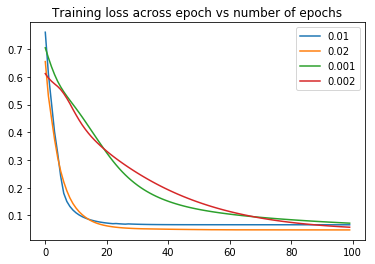

In [20]:
for learning_rate in [0.01,0.02,0.001,0.002]:
    num_epochs = 100
    e_losses=[]
    loss_across_epoch=[]
    model1 = Net_5(x_train.shape[1])
    optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate)
    for e in range(num_epochs):
        e_losses = train_epoch(model1,optimizer ,criteria,100)
        loss_to_plot = sum(e_losses)/len(e_losses)
        loss_across_epoch.append(loss_to_plot)
    
    print("Accuracy for the testing data with learning rate ",learning_rate)
    testingAccuracy(model1,x_test,output1)
    print("Accuracy for the training data")
    testingAccuracy(model1,x_train,train_numpy[:,-1].astype('float64'))
    plt.title('Training loss across epoch vs number of epochs')
    plt.plot(loss_across_epoch)
    plt.legend(['0.01','0.02','0.001','0.002'], loc='upper right')